In [128]:
import pandas as pd
import numpy as np

df_num = 5
kospi = pd.read_csv("./kospi(18~22).csv")
kospi = kospi[['회사명','종목코드', '회계년도','PBR','ROE','수익률']]
kospi['종목코드'] = kospi['종목코드'].astype(str).str.zfill(6)
kospi = kospi.replace([np.inf, -np.inf], 0)
kospi['MY'] = kospi['PBR']*1.4 + kospi['ROE']*1.1

In [129]:
PBR_list = [pd.DataFrame() for _ in range(df_num)]

for i, (year, group_df) in enumerate(kospi.groupby('회계년도')):
    sorted_df = group_df.sort_values('MY', ascending=False)
    PBR_list[i] = sorted_df.head(150)  # sorted_df를 momentum_list에 추가




ROE_list = [pd.DataFrame() for _ in range(df_num)]

for i, (year, group_df) in enumerate(kospi.groupby('회계년도')):
    sorted_df = group_df.sort_values('ROE', ascending=False)
    ROE_list[i] = sorted_df.head(0)  # sorted_df를 momentum_list에 추가




In [130]:
Port_list = [pd.DataFrame() for _ in range(df_num)]

for i in range(df_num):
    Port_list[i] = pd.concat([PBR_list[i], ROE_list[i]])

Port_list[1]['종목코드']

1058    081660
2387    009420
317     282330
425     068270
2149    021240
         ...  
1925    229640
1592    002170
2375    004960
65      012610
1449    004000
Name: 종목코드, Length: 150, dtype: object

In [131]:
from dateutil.relativedelta import relativedelta
import requests as rq
from io import BytesIO
from datetime import datetime


Port_Re_list = [pd.DataFrame() for _ in range(df_num)]

adjust_price = pd.DataFrame(columns=['날짜', '종목', '종가'])
start_year = 2019


for j in range(len(Port_list)):#포트폴리오 수대로 9번 돌음.
    year = start_year+j

    for i in range(len(Port_list[j].index)):#종목 수대로 28번 돌음.
        ticker = Port_list[j]['종목코드'].iloc[i]
        name = Port_list[j]['회사명'].iloc[i]

        to_ = datetime(year, 4, 1)
        to = to_.strftime("%Y%m%d")
        fr = (to_ + relativedelta(years=-1)).strftime("%Y%m%d")

        url = f'''https://fchart.stock.naver.com/siseJson.nhn?symbol={ticker}&requestType=1
        &startTime={fr}&endTime={to}&timeframe=month'''

        data = rq.get(url).content
        data_price = pd.read_csv(BytesIO(data))


        price = data_price.iloc[:, 0:5]
        price.columns = ['날짜', '시가', '고가', '저가', '종가']
        price = price.dropna()
        price['날짜'] = price['날짜'].str.extract('(\d+)')
        price['날짜'] = pd.to_datetime(price['날짜'])
        # price['종목코드'] = ticker
        price['종목'] = name

        # price['수익률'] = price.groupby('종목')['종가'].pct_change() * 10
        columns_to_keep = ['날짜', '종목', '종가']
        price = price[columns_to_keep]

        price = price.dropna()
        price.set_index('날짜', inplace=True)

        Port_Re_list[j][price['종목'].iloc[0]] = price['종가']
        


Port_Re_list[0]



/var/folders/3q/_hd1yc9n1bb97ktwdsjxvf640000gn/T/ipykernel_32478/1545288086.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Port_Re_list[j][price['종목'].iloc[0]] = price['종가']
/var/folders/3q/_hd1yc9n1bb97ktwdsjxvf640000gn/T/ipykernel_32478/1545288086.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Port_Re_list[j][price['종목'].iloc[0]] = price['종가']
/var/folders/3q/_hd1yc9n1bb97ktwdsjxvf640000gn/T/ipykernel_32478/1545288086.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

,삼화콘덴서공업,더존비즈온,엘지생활건강,코웨이,STX,한국쉘석유,한미약품,한올바이오파마,한미사이언스,부광약품,...,해성디에스,엘에스,강원랜드,서흥,조선선재,한세예스24홀딩스,대우건설,LG이노텍,롯데케미칼,동아지질
날짜,,,,,,,,,,,,,,,,,,,,,
2018-04-30,64900.0,49400.0,1370000.0,87500.0,26638.0,333000.0,424715.0,30550.0,70879.0,17500.0,...,17600.0,77900.0,28900.0,34050.0,81700.0,11050.0,6350.0,116500.0,394338.0,20950.0
2018-05-31,71300.0,43800.0,1343000.0,87300.0,26638.0,333500.0,440210.0,32100.0,64683.0,19486.0,...,17200.0,85500.0,26850.0,32900.0,107500.0,8270.0,6450.0,144000.0,350999.0,24500.0
2018-06-29,87600.0,62000.0,1396000.0,86600.0,26638.0,353500.0,383701.0,24950.0,58853.0,15851.0,...,19600.0,75000.0,26150.0,32200.0,86400.0,7600.0,5870.0,144500.0,331472.0,17500.0
2018-07-31,89100.0,54300.0,1210000.0,93800.0,16029.0,351500.0,386892.0,24300.0,63135.0,15447.0,...,19100.0,75000.0,26000.0,28800.0,87100.0,7590.0,5680.0,163000.0,342426.0,16000.0
2018-08-31,88000.0,57000.0,1265000.0,91400.0,16580.0,339000.0,453424.0,31700.0,79169.0,17365.0,...,17400.0,67200.0,28950.0,30950.0,89600.0,9420.0,5240.0,143500.0,300992.0,17950.0
2018-09-28,74500.0,61100.0,1276000.0,86800.0,15340.0,342000.0,455702.0,32600.0,79988.0,18577.0,...,17150.0,68500.0,28700.0,31500.0,87500.0,9870.0,5920.0,130500.0,264797.0,18950.0
2018-10-31,56100.0,43350.0,1044000.0,70300.0,12217.0,344500.0,354992.0,23700.0,60765.0,15009.0,...,15700.0,50500.0,28700.0,27300.0,71200.0,8830.0,4525.0,124000.0,250033.0,13150.0
2018-11-30,61400.0,49900.0,1160000.0,78400.0,12860.0,348500.0,403297.0,31400.0,67690.0,18139.0,...,15100.0,53000.0,32250.0,24250.0,85000.0,9210.0,4970.0,99800.0,259558.0,15650.0
2018-12-28,53200.0,51900.0,1101000.0,74100.0,10793.0,336500.0,430998.0,36200.0,73289.0,21677.0,...,12950.0,49100.0,32000.0,23400.0,79000.0,8010.0,5390.0,86400.0,263844.0,17150.0


In [132]:
from scipy.optimize import minimize

Sharpe_list = [pd.DataFrame() for _ in range(df_num)]

for i in range(df_num):

    # 주식들의 티커를 리스트로 만듭니다.
    stocks = Port_Re_list[i].columns.tolist()
    
    # 로그 수익률을 계산합니다.
    log_returns = np.log(Port_Re_list[i] / Port_Re_list[i].shift(1))
    # returns = Port_Re_list[i]/Port_Re_list[i].shift(1)

    # 무위험 이자율을 설정합니다. 필요에 따라 이 값을 조절할 수 있습니다.
    rf = 0.0

    # 목적 함수: 샤프 비율의 음수를 최소화합니다.
    def neg_sharpe_ratio(weights):
        portfolio_return = np.sum(log_returns.mean() * weights) * 252
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
        sharpe_ratio = (portfolio_return - rf) / portfolio_volatility

        # return -np.sum(returns.mean() * weights) #수익률만을 기준으로 한다면
        return -sharpe_ratio

    # 제약 조건: 가중치의 합이 1이 되어야 합니다.
    cons = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1})

    # 가중치의 범위: 0과 1 사이입니다.
    bounds = tuple((0, 1) for x in range(len(stocks)))

    # 초기 가중치: 모든 주식에 대해 동일하게 배분합니다.
    init_weights = [1/len(stocks) for x in range(len(stocks))]

    # 최적화 과정을 수행합니다.
    opt_weights = minimize(neg_sharpe_ratio, init_weights, method='SLSQP', bounds=bounds, constraints=cons)

    # print("Optimal weights:", opt_weights.x)
    formatted_weights = [format(w, f".10f") for w in opt_weights.x]
    print(formatted_weights)


    Sharpe_list[i] = pd.DataFrame({'종목': stocks, '가중치': opt_weights.x})
Sharpe_list[1]


['0.0000353089', '0.0000147030', '0.0000074194', '0.0000213782', '0.0000419445', '0.0000014855', '0.0000057341', '0.0000030011', '0.0000118797', '0.0000242478', '0.0000069008', '0.0002060030', '0.0000390615', '0.0000033007', '0.0004383349', '0.0007575685', '0.0003333335', '0.0015297338', '0.0000109131', '0.0000049864', '0.0006765675', '0.0000072063', '0.0183011679', '0.0000455508', '0.0000081069', '0.0001314622', '0.0000294362', '0.0862806556', '0.0014230657', '0.0000086367', '0.0000090439', '0.0000248397', '0.0000069897', '0.0000139598', '0.0005296551', '0.2761650466', '0.0000129484', '0.0000158072', '0.0052168657', '0.0000134437', '0.0000353478', '0.0000155484', '0.0000106688', '0.0134971021', '0.0000078056', '0.0000161746', '0.0000044330', '0.0000048828', '0.0000109307', '0.0599505194', '0.0252632792', '0.0000137264', '0.0000054319', '0.0000111485', '0.0002561702', '0.0000161522', '0.0004079751', '0.0000293528', '0.0000074961', '0.0000148951', '0.0000098576', '0.0004119313', '0.0000

,종목,가중치
0,휠라홀딩스,0.000013
1,한올바이오파마,0.000010
2,비지에프리테일,0.000007
3,셀트리온,0.000012
4,코웨이,0.000003
...,...,...
145,엘에스전선아시아,0.000011
146,삼양통상,0.206693
147,한신공영,0.000002
148,경인양행,0.000015


In [ ]:
    stocks = Port_Re_list[i].columns.tolist()


    # 로그 수익률을 계산합니다.
    log_returns = np.log(Port_Re_list[i] / Port_Re_list[i].shift(1))
    # returns = Port_Re_list[i]/Port_Re_list[i].shift(1)

    # 무위험 이자율을 설정합니다. 필요에 따라 이 값을 조절할 수 있습니다.
    rf = 0.0

    # 목적 함수: 샤프 비율의 음수를 최소화합니다.
    def neg_sharpe_ratio(weights):
        portfolio_return = np.sum(log_returns.mean() * weights) * 252
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
        sharpe_ratio = (portfolio_return - rf) / portfolio_volatility

        # return -np.sum(returns.mean() * weights) #수익률만을 기준으로 한다면

        return -sharpe_ratio

    # 제약 조건: 가중치의 합이 1이 되어야 합니다.
    cons = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1})

    # 가중치의 범위: 0과 1 사이입니다.
    bounds = tuple((0, 1) for x in range(len(stocks)))

    # 초기 가중치: 모든 주식에 대해 동일하게 배분합니다.
    init_weights = [1/len(stocks) for x in range(len(stocks))]

    # 최적화 과정을 수행합니다.
    opt_weights = minimize(neg_sharpe_ratio, init_weights, method='SLSQP', bounds=bounds, constraints=cons)

    # print("Optimal weights:", opt_weights.x)
    formatted_weights = [format(w, f".10f") for w in opt_weights.x]
    print(formatted_weights)


    Sharpe_list[i] = pd.DataFrame({'종목': stocks, '가중치': opt_weights.x})
Sharpe_list[1]


In [133]:
#년도 별로 수익률을 구하는 코드를 짜고, sharpe ratio를 kospi와 비교
adjust_price = pd.read_csv("./adjust_price.csv")
adjust_price = adjust_price.dropna()

In [134]:
adjust_price = adjust_price.drop(adjust_price.columns[0], axis=1)
adjust_price

,날짜,종목,종목코드,종가,수익률
1,2014-04-01,DB하이텍,990,6640.0,0.031056
2,2015-04-01,DB하이텍,990,5880.0,-0.114458
3,2016-04-01,DB하이텍,990,18100.0,2.078231
4,2017-04-03,DB하이텍,990,20350.0,0.124309
5,2018-04-02,DB하이텍,990,14150.0,-0.304668
...,...,...,...,...,...
7465,2019-04-01,흥아해운,3280,3523.0,-0.564739
7466,2020-04-01,흥아해운,3280,1555.0,-0.558615
7467,2021-04-01,흥아해운,3280,1555.0,0.000000
7468,2022-04-01,흥아해운,3280,2850.0,0.832797


In [135]:
start_Y = 2020
i = 0
re = 1
total_re = [0, 0, 0, 0, 0]

for i in range(df_num):
    year = start_Y+i
    end_year = year+1
    # 2015년 4월부터 2016년 4월까지의 데이터를 추출합니다.
    prices = adjust_price[(adjust_price['날짜'] >= str(year)+'-04-01') & (adjust_price['날짜'] < str(end_year)+'-04-01')]

    # 데이터를 종목명에 따라 병합합니다.
    merged_data = pd.merge(Sharpe_list[i], prices, left_on='종목', right_on='종목')

    # 각 종목의 수익률에 대해 포트폴리오의 가중치를 곱합니다.
    merged_data['가중수익률'] = merged_data['가중치'] * merged_data['수익률']

    # 모든 종목에 대해 계산된 가중치를 더하여 전체 수익률을 계산합니다.
    total_return = merged_data['가중수익률'].sum()
    total_re[i] = total_return
    re *= (1+total_return)
    print(re)
  
    

0.7739980478395743
1.32248174626618
1.3236258634227778
1.5357300680573496
1.5357300680573496


In [136]:
Sharpe_list[0].sum()

종목     삼화콘덴서공업더존비즈온엘지생활건강코웨이STX한국쉘석유한미약품한올바이오파마한미사이언스...
가중치                                             1.006039
dtype: object

[*********************100%***********************]  1 of 1 completed


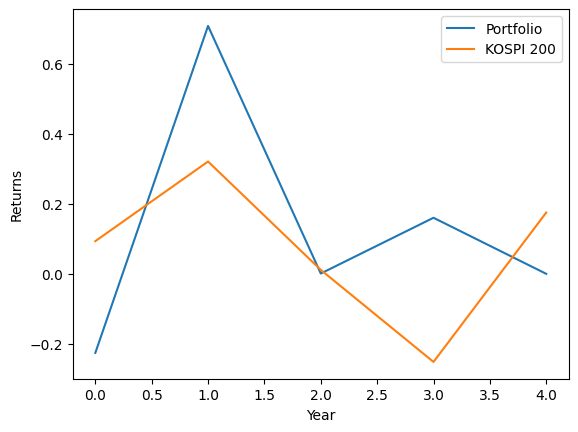

In [138]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# KOSPI200 지수를 다운로드
kospi_data = yf.download('^KS11', start='2019-01-01', end='2023-12-31')

# 연도별 첫번째 거래일과 마지막 거래일 선택
kospi_data['Year'] = kospi_data.index.year
first_days = kospi_data.groupby(kospi_data['Year']).first()
last_days = kospi_data.groupby(kospi_data['Year']).last()

# 연간 수익률 계산
kospi_returns = (last_days['Close'] - first_days['Close']) / first_days['Close']

# 주어진 포트폴리오 수익률 리스트. total_re가 이미 있을 것이라고 가정합니다.
portfolio_returns = total_re  # total_re 리스트가 있다고 가정

# 연도 리스트. 그래프를 그릴 때 필요합니다.
years = range(len(portfolio_returns))

# 그래프를 그립니다.
plt.plot(years, portfolio_returns, label='Portfolio')
plt.plot(years, kospi_returns, label='KOSPI 200')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()

plt.show()

[*********************100%***********************]  1 of 1 completed


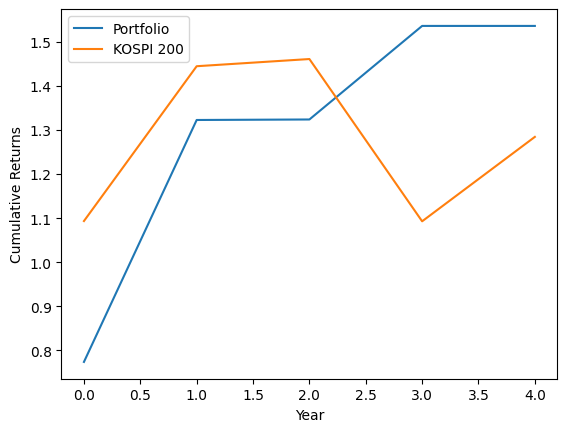

In [139]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# KOSPI200 지수를 다운로드
kospi_data = yf.download('^KS11', start='2019-01-01', end='2023-12-31')

# 연도별 첫번째 거래일과 마지막 거래일 선택
kospi_data['Year'] = kospi_data.index.year
first_days = kospi_data.groupby(kospi_data['Year']).first()
last_days = kospi_data.groupby(kospi_data['Year']).last()

# 연간 수익률 계산
kospi_returns = (last_days['Close'] - first_days['Close']) / first_days['Close'] + 1

# 연간 누적 수익률 계산
kospi_cumulative_returns = kospi_returns.cumprod()

# 주어진 포트폴리오 수익률 리스트. total_re가 이미 있을 것이라고 가정합니다.
# 연간 수익률에서 누적 수익률로 변경
portfolio_returns = list(map(lambda x: x + 1, total_re))  # total_re 리스트가 있다고 가정
portfolio_cumulative_returns = pd.Series(portfolio_returns).cumprod()

# 연도 리스트. 그래프를 그릴 때 필요합니다.
years = range(len(portfolio_returns))

# 그래프를 그립니다.
plt.plot(years, portfolio_cumulative_returns, label='Portfolio')
plt.plot(years, kospi_cumulative_returns, label='KOSPI 200')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.show()